# Attrition Case Study

In [1]:
import pandas as pd

In [2]:
A=pd.read_excel("/Users/qkazi/Desktop/Faizan/ML Projects/Attrition Case Study.xlsx")

In [3]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
A.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# EDA

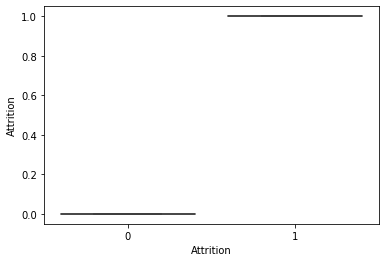

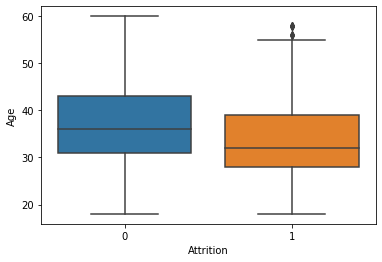

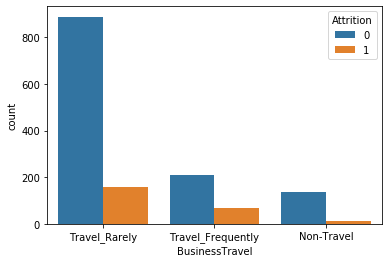

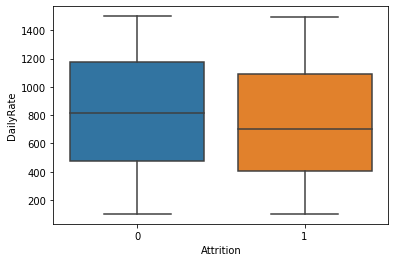

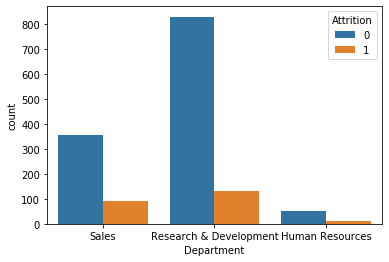

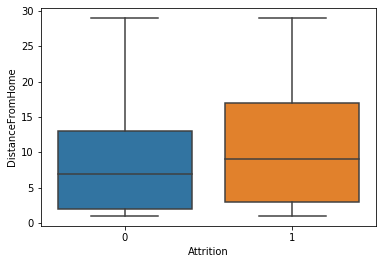

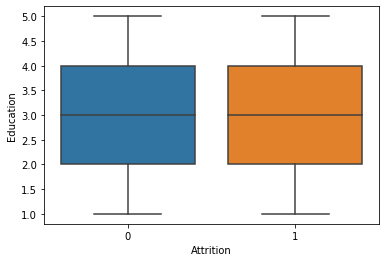

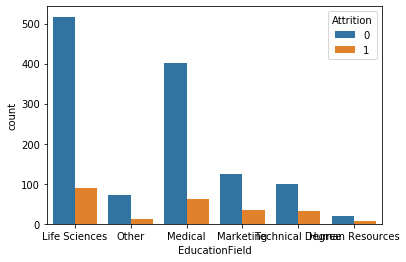

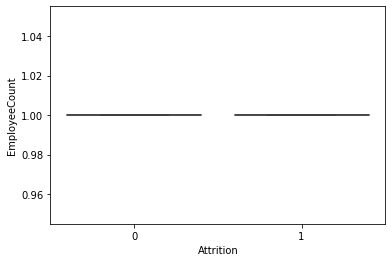

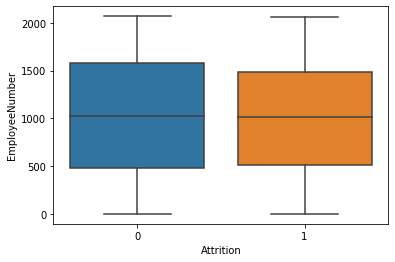

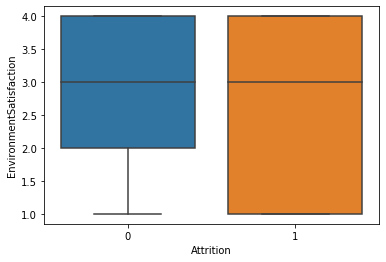

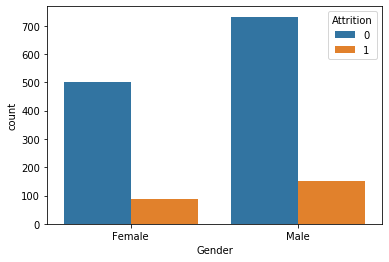

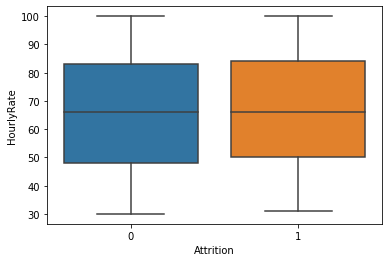

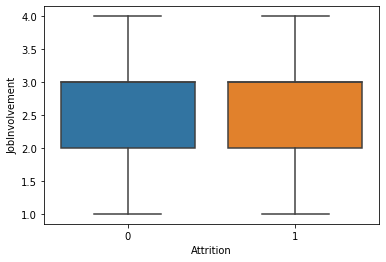

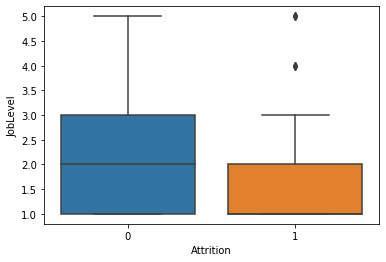

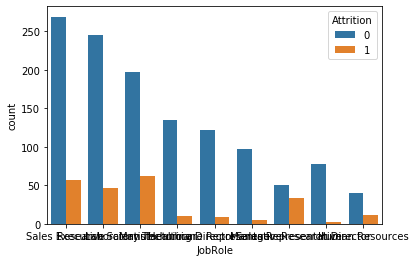

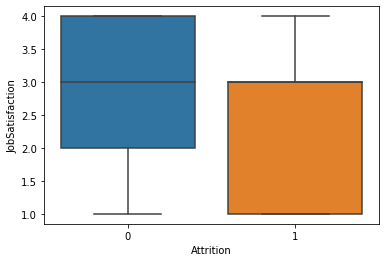

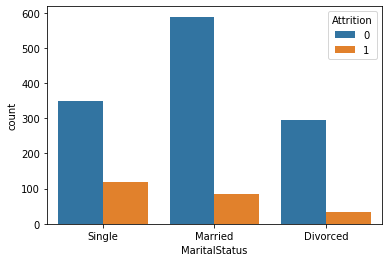

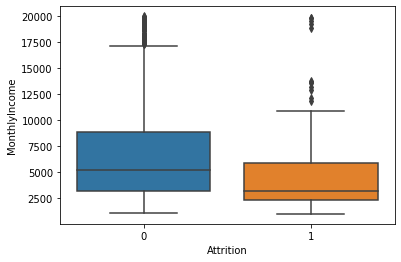

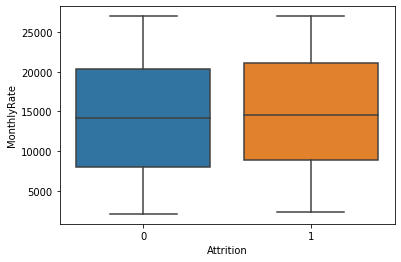

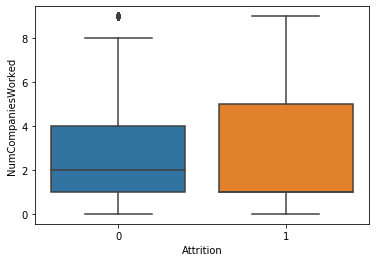

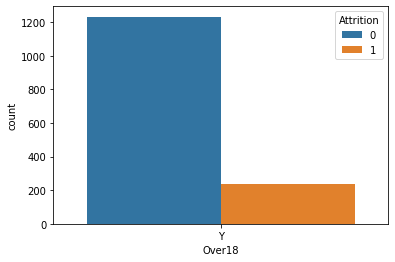

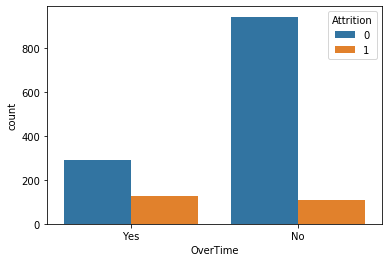

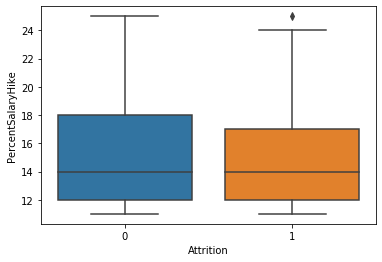

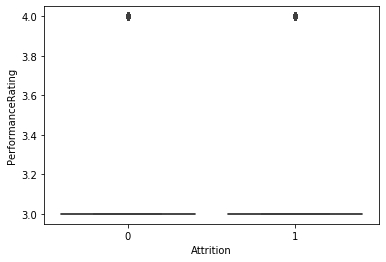

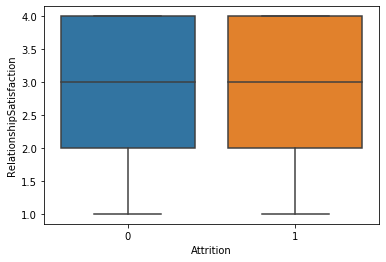

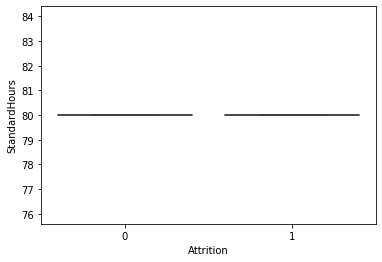

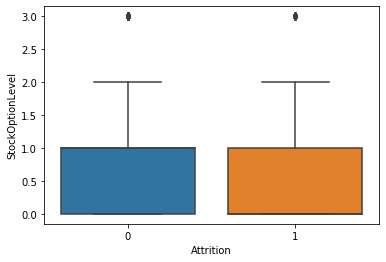

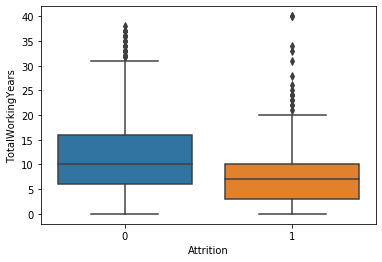

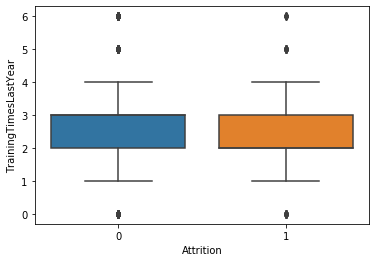

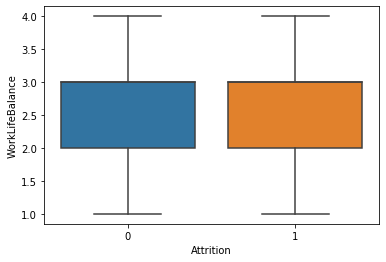

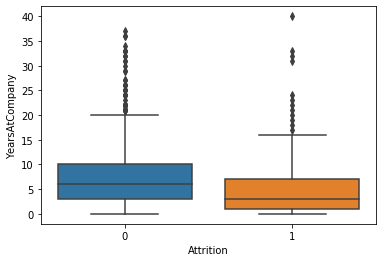

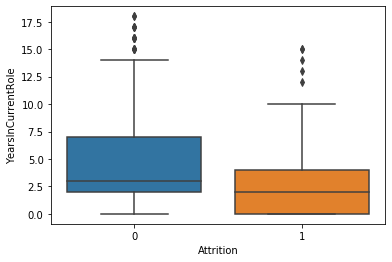

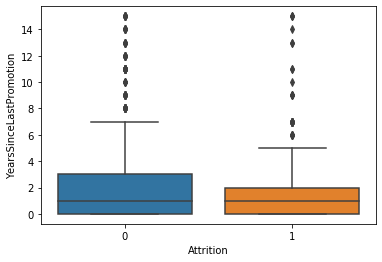

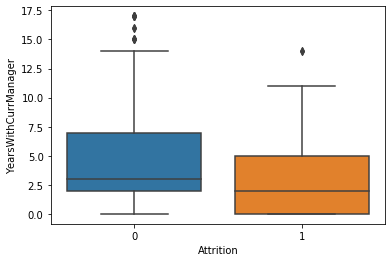

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb
for i in A.columns:
    if(A[i].dtypes=="object"):
        sb.countplot(A[i],hue=A.Attrition)
        plt.show()
    else:
        sb.boxplot(A.Attrition,A[i])
        plt.show()

In [7]:
A.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [8]:
(1233-237)/1233

0.8077858880778589

In [9]:
for i in A.columns:
    if(A[i].dtypes=="object"):
        print(str(i)+":"+str(A[i].unique()))
        print(A[i].value_counts())
        print("-------------------------------")

BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-------------------------------
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-------------------------------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
-------------------------------
Gender:['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
-------------------------------
JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Repr

In [10]:
A=A.drop(labels=["Over18","EmployeeNumber","StandardHours","EmployeeCount"],axis=1)

In [11]:
A.corr()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.056652,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.077924,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,-0.103369,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,-0.006846,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.130016,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,-0.169105,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.103481,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


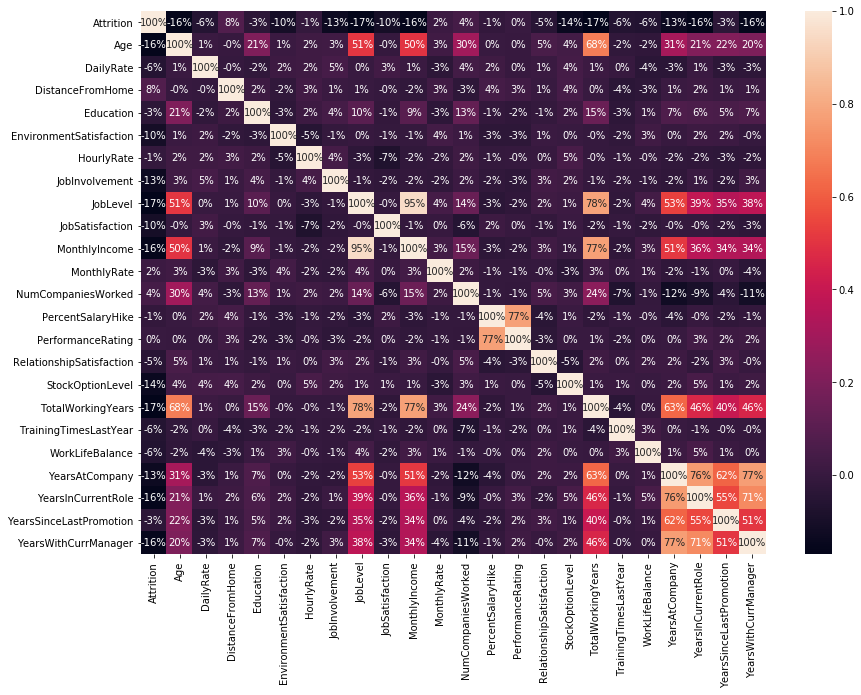

In [12]:
plt.figure(figsize=(14,10))
sb.heatmap(A.corr(),annot=True,fmt=".0%")

In [13]:
def catconsep(df):
    cat=[]
    con=[]
    for i in A.columns:
        if(A[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)
    return cat,con

In [14]:
cat,con=catconsep(A)

In [15]:
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [16]:
con

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [17]:
B=A[con].join(pd.get_dummies(A[cat]))

In [18]:
B.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,41,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,0,49,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,1,37,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,0,33,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,0,27,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [19]:
X=B.drop(labels="Attrition",axis=1)
Y=B[["Attrition"]]

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)

C:\Users\qkazi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\qkazi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.8367346938775511

# Multi-Linear Regression

In [23]:
from statsmodels.api import OLS,add_constant
x_const=add_constant(xtrain)
est=OLS(ytrain,xtrain)
est2=est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     8.916
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           6.44e-48
Time:                        16:40:22   Log-Likelihood:                -313.09
No. Observations:                1176   AIC:                             716.2
Df Residuals:                    1131   BIC:                             944.3
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0040      0.002     -2.635      0.009      -0.007      -0.001
DailyRate                         -2.719e-05   2.36e-05     -1.151      0.250   -7.35e-05    1.91e-05
DistanceFromHome                      0.0036      0.001      3.035      0.002       0.001       0.006
Education                             0.0046      0.010      0.476      0.634      -0.014       0.024
EnvironmentSatisfaction              -0.0374      0.009     -4.300      0.000      -0.055      -0.020
HourlyRate                        -6.674e-05      0.000     -0.142      0.887      -0.001       0.001
JobInvolvement                       -0.0510      0.013     -3.792      0.000      -0.077      -0.025
JobLevel                              0.0085      0.032      0.266      0.790      -0.054       0.071
JobSatisfaction                      -0.0323      0.009     -3.730      0.000      -0.049      -0.015
MonthlyIncome                     -2.083e-07   8.47e-06     -0.025      0.980   -1.68e-05    1.64e-05
MonthlyRate                        1.112e-06   1.33e-06      0.833      0.405   -1.51e-06    3.73e-06
NumCompaniesWorked                    0.0174      0.004      4.095      0.000       0.009       0.026
PercentSalaryHike                    -0.0056      0.004     -1.347      0.178      -0.014       0.003
PerformanceRating                     0.0517      0.042      1.229      0.219      -0.031       0.134
RelationshipSatisfaction             -0.0203      0.009     -2.295      0.022      -0.038      -0.003
StockOptionLevel                     -0.0128      0.015     -0.846      0.398      -0.043       0.017
TotalWorkingYears                    -0.0042      0.003     -1.520      0.129      -0.010       0.001
TrainingTimesLastYear                -0.0122      0.008     -1.580      0.114      -0.027       0.003
WorkLifeBalance                      -0.0385      0.013     -2.871      0.004      -0.065      -0.012
YearsAtCompany                        0.0069      0.003      2.008      0.045       0.000       0.014
YearsInCurrentRole                   -0.0103      0.004     -2.417      0.016      -0.019      -0.002
YearsSinceLastPromotion               0.0104      0.004      2.710      0.007       0.003       0.018
YearsWithCurrManager                 -0.0108      0.004     -2.407      0.016      -0.020      -0.002
BusinessTravel_Non-Travel             0.0392      0.031      1.270      0.204      -0.021       0.100
BusinessTravel_Travel_Frequently      0.1903      0.029      6.645      0.000       0.134       0.247
BusinessTravel_Travel_Rarely          0.1079      0.025      4.369      0.000       0.059       0.156
Department_Human Resources            0.0171      0.089      0.192      0.847      -0.158       0.192
Department_Research & D

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(metric="euclidean",n_neighbors=5)

In [25]:
model=knn.fit(xtrain,ytrain)

C:\Users\qkazi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [26]:
pred=model.predict(xtest)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.8129251700680272

In [28]:
from sklearn.model_selection import GridSearchCV
knn1=KNeighborsClassifier(metric="euclidean")
tp={"n_neighbors":range(2,20,1)}
cv=GridSearchCV(knn1,tp,scoring="accuracy",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

C:\Users\qkazi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qkazi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qkazi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qkazi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

{'n_neighbors': 10}

In [29]:
knn=KNeighborsClassifier(metric="euclidean",n_neighbors=10)
model=knn.fit(xtrain,ytrain)
pred=model.predict(xtest)

C:\Users\qkazi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [30]:
accuracy_score(ytest,pred)

0.8367346938775511

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)

C:\Users\qkazi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,pred)

0.8367346938775511

In [33]:
confusion_matrix(ytest,pred)

array([[240,   5],
       [ 43,   6]], dtype=int64)

In [34]:
rfc1=RandomForestClassifier(criterion="entropy",random_state=0)
tp={"n_estimators":range(2,25,1)}
cv=GridSearchCV(rfc1,tp,scoring="accuracy",cv=6)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

C:\Users\qkazi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qkazi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qkazi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qkazi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

{'n_estimators': 23}

In [35]:
rfc=RandomForestClassifier(n_estimators=23,criterion="entropy",random_state=0)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,pred)

C:\Users\qkazi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8673469387755102

In [36]:
B

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,41,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,0,49,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,1,37,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,0,33,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,0,27,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,884,23,2,3,41,4,2,4,...,0,0,0,0,0,0,1,0,1,0
1466,0,39,613,6,1,4,42,2,3,1,...,0,0,0,0,0,0,1,0,1,0
1467,0,27,155,4,3,2,87,4,2,2,...,1,0,0,0,0,0,1,0,0,1
1468,0,49,1023,2,3,4,63,2,2,2,...,0,0,0,1,0,0,1,0,1,0
